In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import collections

In [2]:
!ls data

sample_submission.csv  train_features.csv	    train_targets_scored.csv
test_features.csv      train_targets_nonscored.csv


# look at data

## load data

In [3]:
train_features = pd.read_csv('data/train_features.csv')
test_features = pd.read_csv('data/test_features.csv')

train_targets_scored = pd.read_csv('data/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('data/train_targets_nonscored.csv')

In [4]:
train_features.shape

(23814, 876)

train_features.csv    
  
Features for the training set.   
  
Features   
  
g- signify gene expression data, and   
  
c- signify cell viability data. 
  
cp_type indicates samples treated with a compound (cp_vehicle) or with a control perturbation (ctrl_vehicle);   
control perturbations have no MoAs;   
<span class="mark">trt_cp             92%  
ctl_vehicle   8%</span>  
  
cp_time indicate treatment duration (24, 48, 72 hours)   
均等  

cp_dose dose (high or low).  
均等

## basic shape

In [5]:
train_features.head(5)

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [6]:
test_features.shape

(3982, 876)

In [7]:
train_targets_scored.shape

(23814, 207)

In [8]:
train_targets_scored.head(5)

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_targets_nonscored.shape

(23814, 403)

In [10]:
train_targets_nonscored.head(5)

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## look at train target

### 提取的重要变量汇总  
**scored_targets**                     需要被打分的targets的名字  index   
**train_targets_data**            训练集中target的数值，0-1 One-Hot变量  numpy

In [11]:
scored_targets = train_targets_scored.columns[1:]
print(scored_targets[:5])

Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist'],
      dtype='object')


In [12]:
nonscored_targets = train_targets_nonscored.columns[1:]
print(nonscored_targets[:5])

Index(['abc_transporter_expression_enhancer', 'abl_inhibitor', 'ace_inhibitor',
       'acetylcholine_release_enhancer', 'adenosine_deaminase_inhibitor'],
      dtype='object')


### 查看每个sample_id对应几个target

In [13]:
train_targets_data = train_targets_scored.iloc[:,1:].values
train_targets_num = np.sum(train_targets_data,axis = 1)
train_targets_num[:5]

array([1, 0, 3, 0, 1])

In [14]:
target_num_unique, target_num_counts = np.unique(train_targets_num, return_counts=True)

In [15]:
def my_plot_pie(labels,sizes,explode):
    plt.figure(figsize=(6,9)) #调节图形大小
    labels = labels #定义标签
    sizes = sizes#每块值
    #colors = ['red','yellowgreen','lightskyblue','yellow'] #每块颜色定义
    explode = explode #将某一块分割出来，值越大分割出的间隙越大
    patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      #colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
    #patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
    # x，y轴刻度设置一致，保证饼图为圆形
    plt.axis('equal')
    plt.show()

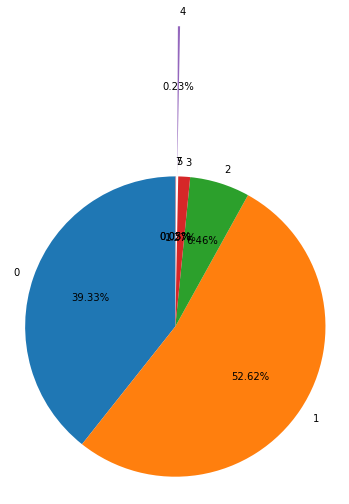

In [16]:
my_plot_pie(target_num_unique,target_num_counts,explode = (0,0,0,0,1,0,0))

### 查看每种不同的target有几个samples被检测到了

In [17]:
target_popular = np.sum(train_targets_data,axis = 0)
target_popular_dict = {'target_name' : scored_targets,'popular' : target_popular}
target_popular_df = pd.DataFrame(target_popular_dict)
target_popular_df.sort_values(by='popular',ascending=False, inplace=False)[:5]

,target_name,popular
136,nfkb_inhibitor,832
163,proteasome_inhibitor,726
71,cyclooxygenase_inhibitor,435
79,dopamine_receptor_antagonist,424
177,serotonin_receptor_antagonist,404


(array([36., 47., 37., 20., 15., 10.,  7.,  4.,  0.,  3.,  1.,  2.,  0.,
         1.,  2.,  2.,  6.,  1.,  2.,  0.,  2.,  1.,  1.,  0.,  2.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.  ,  17.62,  34.24,  50.86,  67.48,  84.1 , 100.72, 117.34,
        133.96, 150.58, 167.2 , 183.82, 200.44, 217.06, 233.68, 250.3 ,
        266.92, 283.54, 300.16, 316.78, 333.4 , 350.02, 366.64, 383.26,
        399.88, 416.5 , 433.12, 449.74, 466.36, 482.98, 499.6 , 516.22,
        532.84, 549.46, 566.08, 582.7 , 599.32, 615.94, 632.56, 649.18,
        665.8 , 682.42, 699.04, 715.66, 732.28, 748.9 , 765.52, 782.14,
        798.76, 815.38, 832.  ]),
 <BarContainer object of 50 artists>)

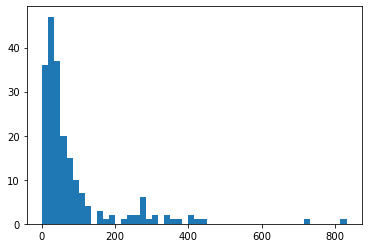

In [18]:
plt.figure()
plt.hist(target_popular_df['popular'].values,bins=50, density=False, weights=None, cumulative=False)

In [19]:
target_popular_num_unique, target_popular_num_counts = np.unique(target_popular, return_counts=True)
target_popular_num_dict = {'number' : target_popular_num_unique,'count' : target_popular_num_counts}
target_popular_num_df = pd.DataFrame(target_popular_num_dict)
target_popular_num_df.sort_values(by='count',ascending=False, inplace=False)[:10]

,number,count
1,6,16
6,18,13
17,36,12
3,12,11
10,25,8
25,48,7
18,37,6
13,30,6
41,73,5
9,24,5


## 特征提取

### 提取的重要变量汇总  
train_features 特征dataframe

In [34]:
train_features_noid = train_features.iloc[:,1:]

In [91]:
train_g = train_feature_noid.filter(regex=("g-*"))
train_c = train_feature_noid.filter(regex=("c-[0-9]"))

In [109]:
train_g.shape

(23814, 772)

In [110]:
train_c.shape

(23814, 100)

## 对数据集做变换，type，dose

In [41]:
dose_dict = {'D1':0,'D2':1}
type_dict = {'trt_cp':0,'ctl_vehicle':1}    # 92% : 8%
time_dict = {24:1,48:2,72:3}

In [44]:
train_features['cp_type'] = train_features['cp_type'].map(type_dict)
train_features['cp_dose'] = train_features['cp_dose'].map(dose_dict)
train_features['cp_time'] = train_features['cp_time'].map(time_dict)

In [45]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,0,1,0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,0,3,0,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,0,2,0,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,0,2,0,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,0,3,1,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [46]:
train_features.to_csv('data/train_features_nv.csv')

## c,g特征检查

### 大概先看看，把方差很小的剔除？

In [108]:
train_c = train_c.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

(array([ 2.,  1.,  2.,  3.,  2.,  3.,  2.,  3., 10.,  3.,  8., 11., 11.,
        10.,  9.,  7.,  4.,  4.,  2.,  3.]),
 array([0.09283012, 0.096705  , 0.10057989, 0.10445478, 0.10832966,
        0.11220455, 0.11607944, 0.11995432, 0.12382921, 0.1277041 ,
        0.13157898, 0.13545387, 0.13932875, 0.14320364, 0.14707853,
        0.15095341, 0.1548283 , 0.15870319, 0.16257807, 0.16645296,
        0.17032785]),
 <BarContainer object of 20 artists>)

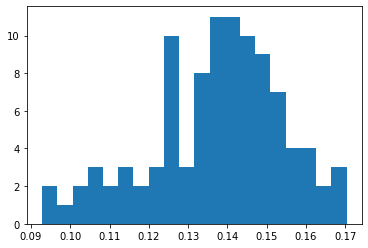

In [115]:
c_std = np.std(train_c.values,axis= 0)
plt.hist(c_std,bins = 20)

In [121]:
import seaborn as sns

<AxesSubplot:>

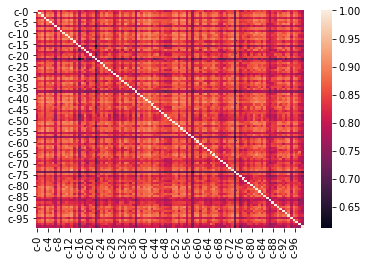

In [122]:
c_corr = train_c.corr()
sns.heatmap(c_corr)

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

In [124]:
model = RandomForestRegressor(random_state=1, max_depth=10)
df=train_c.values
target = train_targets_scored.iloc[:,1:].values
model.fit(df,target)

RandomForestRegressor(max_depth=10, random_state=1)

In [ ]:
joblib.dump(model, 'model/c_rf.pkl')

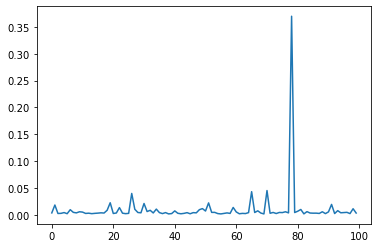

In [186]:
plt.plot(importances)

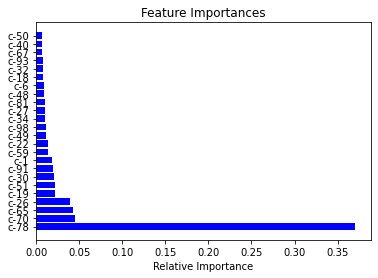

In [190]:
features =  train_c.columns
importances = model.feature_importances_
indices = np.argsort(importances,)[-1:-25:-1] # top 25 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [194]:
c_selected_col_name = features[indices]

In [ ]:
model = RandomForestRegressor(random_state=1, max_depth=15)
df=train_g.values
target = train_targets_scored.iloc[:,1:].values
model.fit(df,target)


In [ ]:
joblib.dump(model, 'model/g_rf.pkl')

In [ ]:
features =  train_g.columns
importances = model.feature_importances_
indices = np.argsort(importances,)[-1:-25:-1] # top 25 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()